## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [23]:
import os
import keras
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 請嘗試設定 GPU：os.environ


In [24]:
train, test = keras.datasets.cifar10.load_data()

In [100]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    if flatten:
        x = scaler.transform(x.reshape((len(x), -1)))    
    return x

    
def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [101]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [106]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16, 8]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [107]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
__________

In [108]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [109]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [110]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 176us/step - loss: 2.2234 - acc: 0.1556 - val_loss: 2.1036 - val_acc: 0.2109
Epoch 2/100
50000/50000 [==============================] - 8s 153us/step - loss: 2.0071 - acc: 0.2463 - val_loss: 1.9173 - val_acc: 0.2773
Epoch 3/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.8555 - acc: 0.3066 - val_loss: 1.8772 - val_acc: 0.3186
Epoch 4/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.7775 - acc: 0.3477 - val_loss: 1.8151 - val_acc: 0.3480
Epoch 5/100
50000/50000 [==============================] - 8s 157us/step - loss: 1.7154 - acc: 0.3760 - val_loss: 1.6950 - val_acc: 0.3813
Epoch 6/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.6693 - acc: 0.3939 - val_loss: 1.6484 - val_acc: 0.3967
Epoch 7/100
50000/50000 [==============================] - 8s 159us/

50000/50000 [==============================] - 7s 138us/step - loss: 0.7111 - acc: 0.7451 - val_loss: 1.9079 - val_acc: 0.5047
Epoch 58/100
50000/50000 [==============================] - 7s 136us/step - loss: 0.6994 - acc: 0.7482 - val_loss: 1.8746 - val_acc: 0.5018
Epoch 59/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.7013 - acc: 0.7473 - val_loss: 1.8875 - val_acc: 0.4938
Epoch 60/100
50000/50000 [==============================] - 7s 139us/step - loss: 0.6880 - acc: 0.7518 - val_loss: 1.9280 - val_acc: 0.5029
Epoch 61/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.6627 - acc: 0.7615 - val_loss: 2.0247 - val_acc: 0.5047
Epoch 62/100
50000/50000 [==============================] - 7s 136us/step - loss: 0.6715 - acc: 0.7579 - val_loss: 2.0526 - val_acc: 0.4982
Epoch 63/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.6481 - acc: 0.7689 - val_loss: 2.0708 - val_acc: 0.5000
Epoch 64/100
50000/50000 [=======

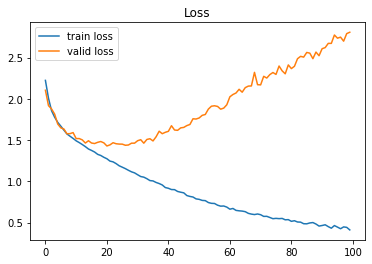

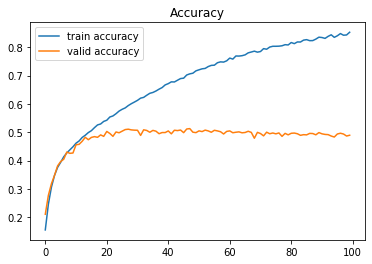

In [112]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()